<a href="https://colab.research.google.com/github/vivianjjiang/ds2002/blob/main/superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [53]:
import sqlite3

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# DDL statements (using SQLite syntax)
cursor.execute('''
CREATE TABLE IF NOT EXISTS heroes (
    hero_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT NOT NULL,
    team TEXT
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS villains (
    villain_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    evil_plan TEXT NOT NULL
);
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS battles (
    battle_id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    villain_id INTEGER,
    outcome TEXT NOT NULL,
    FOREIGN KEY(hero_id) REFERENCES heroes(hero_id),
    FOREIGN KEY(villain_id) REFERENCES villains(villain_id)
);
''')

# Execute the DDL script
cursor.executescript(ddl_statements)
conn.commit()
print('Database schema created successfully.')

Database schema created successfully.


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [54]:
import pandas as pd
# reading in csv files
heroes_df = pd.read_csv('heroes.csv')
villains_df = pd.read_csv('villains.csv')
battles_df = pd.read_csv('battles.csv')

# Display the DataFrame
heroes_df.head()
villains_df.head()
battles_df.head()

,id,hero_id,villain_id,outcome
0,1,1,10,Villain Wins
1,2,9,3,Hero Wins
2,3,8,1,Draw
3,4,5,4,Villain Wins
4,5,1,7,Hero Wins


## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [56]:
# retrieve all superheros and power
heroes_df.to_sql('heroes', conn, if_exists='replace', index=False)
print("Data from CSV has been inserted into the heroes table.")
# Fetch all data from the heroes table
cursor.execute("SELECT heroes.name,heroes.power FROM heroes")
rows = cursor.fetchall()
# Print the results
print("All superheros data:")
for row in rows:
    print(row)

Data from CSV has been inserted into the heroes table.
All superheros data:
('Spider-Man', 'Web-slinging')
('Iron Man', 'Powered Armor')
('Batman', 'Genius Detective')
('Superman', 'Super Strength')
('Thor', 'God of Thunder')
('Wonder Woman', 'Amazonian Strength')
('Black Panther', 'Enhanced Agility')
('The Flash', 'Super Speed')
('Hulk', 'Super Strength')
('Doctor Strange', 'Mystic Arts')


In [57]:
# retrieve all battles where the superhero won
heroes_df.to_sql('heroes', conn, if_exists='replace', index=False)
print("Data from CSV has been inserted into the heroes table.")
battles_df.to_sql('battles', conn, if_exists='replace', index=False)
print("Data from CSV has been inserted into the battles table.")
cursor.execute("SELECT heroes.name, battles.id FROM battles JOIN heroes ON battles.hero_id = heroes.id WHERE outcome = 'Hero Wins'")
battles_hero_won = cursor.fetchall()
print("Battles where the superhero won:")
for row in battles_hero_won:
    print(row)

Data from CSV has been inserted into the heroes table.
Data from CSV has been inserted into the battles table.
Battles where the superhero won:
('Hulk', 2)
('Spider-Man', 5)
('Hulk', 7)
('Batman', 8)
('Black Panther', 9)
('The Flash', 13)
('Batman', 20)
('Batman', 29)
('Thor', 30)


In [58]:
# determine which superhero has fought the most battles
cursor.execute("SELECT heroes.name, COUNT(*) AS battles_won FROM battles JOIN heroes ON battles.hero_id = heroes.id WHERE battles.outcome = 'Hero Wins' GROUP BY heroes.name ORDER BY battles_won DESC LIMIT 1")
max_superhero = cursor.fetchall()
print("The superhero who won the most battles:")
for row in max_superhero:
    print(row)

The superhero who won the most battles:
('Batman', 3)


## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [77]:
battle_names = {
    2: "Clash of the Titans",
    5: "Web of Death",
    7: "Hulk Smash Showdown",
    8: "Dark Knight's Game",
    9: "Wakanda Reckoning",
    13: "Speed Force Fight",
    20: "Shadow of the Night",
    29: "Gotham's Last",
    30: "Thunder's Wrath"
}

# Update the battle_name column with creative names
for battle_id, battle_name in battle_names.items():
    cursor.execute("UPDATE battles SET battle_name = ? WHERE id = ?", (battle_name, battle_id))

# Commit changes
conn.commit()

# Query to retrieve updated battles where the superhero won
cursor.execute(query)
updated_battles_hero_won = cursor.fetchall()

# Display results
updated_battles_hero_won

[('Hulk', 'Clash of the Titans', 2),
 ('Spider-Man', 'Web of Death', 5),
 ('Hulk', 'Hulk Smash Showdown', 7),
 ('Batman', "Dark Knight's Game", 8),
 ('Black Panther', 'Wakanda Reckoning', 9),
 ('The Flash', 'Speed Force Fight', 13),
 ('Batman', 'Shadow of the Night', 20),
 ('Batman', "Gotham's Last", 29),
 ('Thor', "Thunder's Wrath", 30)]

## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

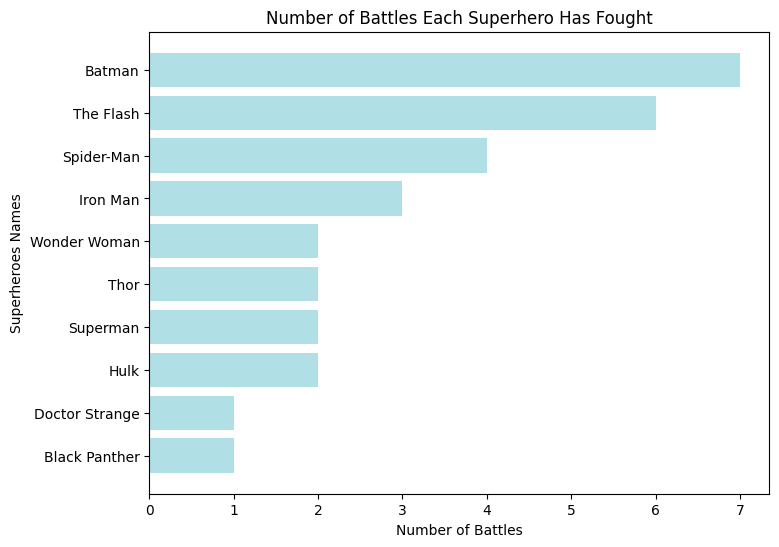

In [66]:
import matplotlib.pyplot as plt

# Query to count the number of battles each superhero has fought
battle_count_query = """
SELECT heroes.name, COUNT(battles.id) AS battle_count
FROM battles
JOIN heroes ON battles.hero_id = heroes.id
GROUP BY heroes.name
ORDER BY battle_count DESC
"""
cursor.execute(battle_count_query)
battle_counts = cursor.fetchall()

# Extract data for visualization
superheroes = [row[0] for row in battle_counts]
battle_counts = [row[1] for row in battle_counts]

# Create bar chart
plt.figure(figsize=(8, 6))
plt.barh(superheroes, battle_counts, color='powderblue')
plt.xlabel("Number of Battles")
plt.ylabel("Superheroes Names")
plt.title("Number of Battles Each Superhero Has Fought")
plt.gca().invert_yaxis()  # Invert y-axis to show highest values on top

# Display the chart
plt.show()


## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!